In [23]:
import nbsetup as nb
import copy
import pickle
import seaborn as sns
import pandas as pd
import itertools
import scipy as sp
import numpy as np
import ensemblepy as ep
import matplotlib.pyplot as plt
from simulations.daisy_world.series import scan

In [24]:
results = pickle.load(open('../../datasets/daisy_sparse_worlds.pickle', 'rb'))

In [25]:
space_data = []
a = np.array([[m.temperatures for m in r.models] for r in results.values()])
for x, r in results.items():
    y = r.y[-1]
    flattens = [m.temperatures.flatten() for m in r.models]
    cont = ep.Continuous(flattens, normalise=(a.min(), a.max()), metrics=('incoherence',))
    for temps in flattens:
        space_data.append({
            'x': x,
            'temp': np.array(temps).mean(),
            'var': np.array(temps).var(),
            'inc': y.incoherence,
            'coh': 1-y.cohesion,
            'tinc': cont.incoherence,
            #'toh': cont.cohesion,
        })
    nb.cp(x)
nb.cp('')
space_data = pd.DataFrame(space_data)

<AxesSubplot:xlabel='x', ylabel='tinc'>

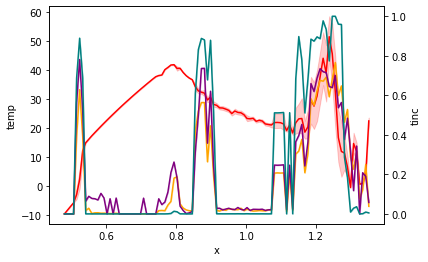

In [26]:
g = sns.lineplot(data=space_data, x='x', y='temp', color='red')
twin = g.twinx()
sns.lineplot(data=space_data, x='x', y='tinc', ax=twin, color='orange')
sns.lineplot(data=space_data, x='x', y='inc', ax=twin, color='purple')
sns.lineplot(data=space_data, x='x', y='coh', ax=twin, color='teal')
#sns.lineplot(data=space_data, x='x', y='toh', ax=twin, color='skyblue')

<AxesSubplot:xlabel='x', ylabel='var'>

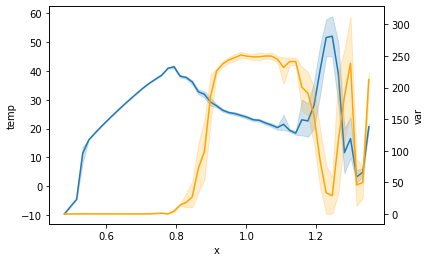

In [17]:
g = sns.lineplot(data=space_data, x='x', y='temp')
sns.lineplot(data=space_data, x='x', y='var', ax=g.twinx(), color='orange')

<AxesSubplot:xlabel='x', ylabel='var'>

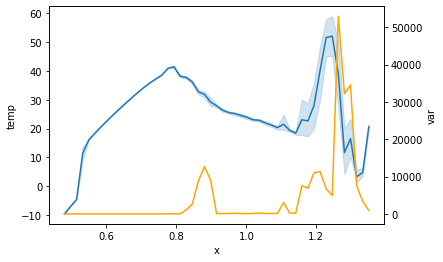

In [7]:
g = sns.lineplot(data=space_data, x='x', y='temp')
#sns.lineplot(data=space_data, x='x', y='var', ax=g.twinx(), color='orange')
sns.lineplot(data=space_data.groupby('x').var().reset_index(), x='x', y='var', ax=g.twinx(), color='orange')

<AxesSubplot:xlabel='x', ylabel='inc'>

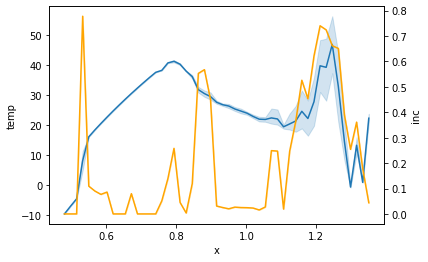

In [132]:
g = sns.lineplot(data=space_data, x='x', y='temp')
sns.lineplot(data=space_data, x='x', y='inc', ax=g.twinx(), color='orange')

<AxesSubplot:xlabel='x', ylabel='inc'>

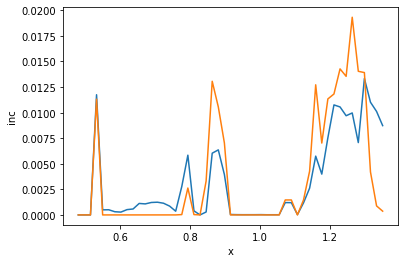

In [118]:
df = data.groupby('x').var().reset_index()
sns.lineplot(data=df, x='x', y='inc')
sns.lineplot(data=df, x='x', y='coh')

<AxesSubplot:xlabel='x', ylabel='inc'>

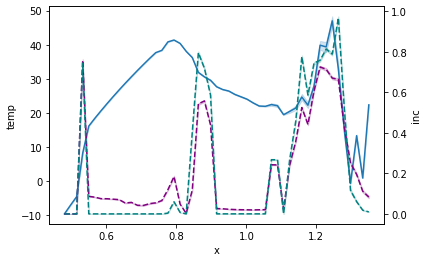

In [112]:
g = sns.lineplot(data=data, x='x', y='temp')
twin = g.twinx()
sns.lineplot(data=data, x='x', y='inc', linestyle='dashed', ax=twin, color='purple')
sns.lineplot(data=data, x='x', y='coh', linestyle='dashed', ax=twin, color='teal')

<AxesSubplot:xlabel='x', ylabel='inc'>

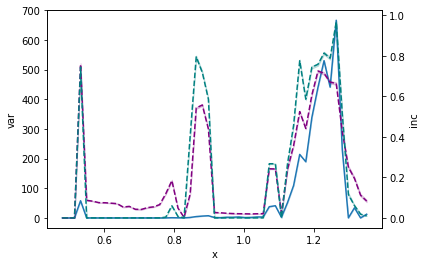

In [115]:
g = sns.lineplot(data=data, x='x', y='var')
twin = g.twinx()
sns.lineplot(data=data, x='x', y='inc', linestyle='dashed', ax=twin, color='purple')
sns.lineplot(data=data, x='x', y='coh', linestyle='dashed', ax=twin, color='teal')

In [101]:
results[0.9324000000000001].models[0].df

AttributeError: 'NoneType' object has no attribute 'get_model_vars_dataframe'

In [90]:
globe = []
for x, r in results.items():
    for m in r.models:
        globe.append({'x': x, 'y': m.temperature})

globe = pd.DataFrame(globe)

In [91]:
data = []
for x, r in results.items():
    for m in r.models:
        for t in m.temperatures.flatten():
            data.append({'x': x, 'y': t})
region = pd.DataFrame(data)

In [92]:
x = list(results.keys())

<AxesSubplot:>

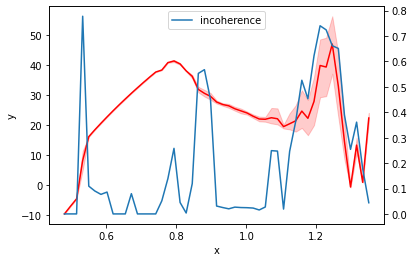

In [95]:
g = sns.lineplot(data=globe, x='x', y='y', color='red')
twin = g.twinx()
sns.lineplot(x=x, y=[r.y[-1].incoherence for r in results.values()], label='incoherence', ax=twin)
#sns.lineplot(x=list(results.keys()), y=[r.y[-1].cohesion for r in results.values()], label='cohesion', ax=twin)

<AxesSubplot:>

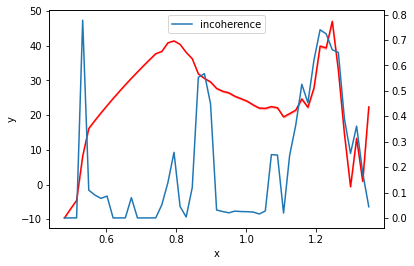

In [96]:
g = sns.lineplot(data=region, x='x', y='y', color='red')
twin = g.twinx()
sns.lineplot(x=x, y=[r.y[-1].incoherence for r in results.values()], label='incoherence', ax=twin)
#sns.lineplot(x=list(results.keys()), y=[r.y[-1].cohesion for r in results.values()], label='cohesion', ax=twin)

<AxesSubplot:xlabel='x', ylabel='y'>

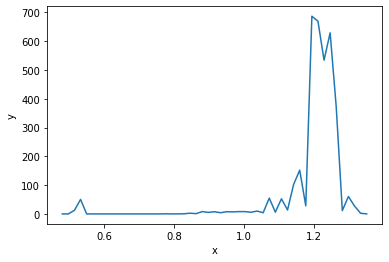

In [85]:
sns.lineplot(data=globe.groupby('x').var().reset_index(), x='x', y='y')

<AxesSubplot:>

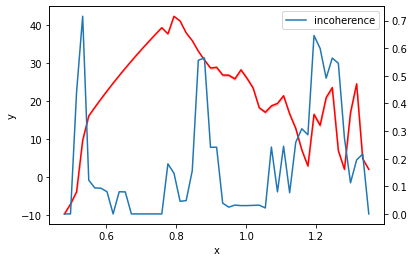

In [81]:
g = sns.lineplot(data=region, x='x', y='y', color='red')
twin = g.twinx()
sns.lineplot(x=list(results.keys()), y=[r.y[-1].incoherence for r in results.values()], label='incoherence', ax=twin)
#sns.lineplot(x=list(results.keys()), y=[r.y[-1].cohesion for r in results.values()], label='cohesion', ax=twin)

In [86]:
results.keys()

dict_keys([0.4974, 0.48, 0.5148, 0.5322, 0.5496, 0.567, 0.6018, 0.5844, 0.6192, 0.6366, 0.654, 0.6714, 0.741, 0.7062, 0.6888000000000001, 0.7236, 0.7932, 0.7758, 0.7584, 0.8106, 0.8628, 0.8454, 0.8280000000000001, 0.8802000000000001, 0.8976000000000001, 0.915, 0.9324000000000001, 0.9498, 0.9846, 0.9672000000000001, 1.002, 1.0194, 1.0368, 1.0716, 1.0542, 1.089, 1.1064, 1.1238000000000001, 1.1412, 1.1586, 1.1934, 1.2108, 1.1760000000000002, 1.2282000000000002, 1.2456, 1.2630000000000001, 1.2804000000000002, 1.2978, 1.3152000000000001, 1.3326000000000002, 1.35])

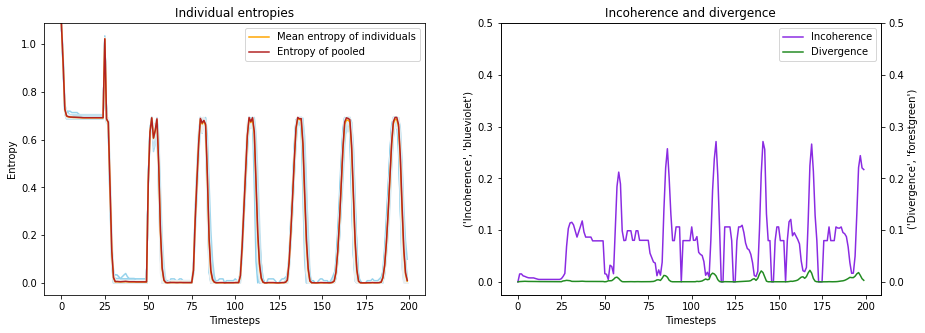

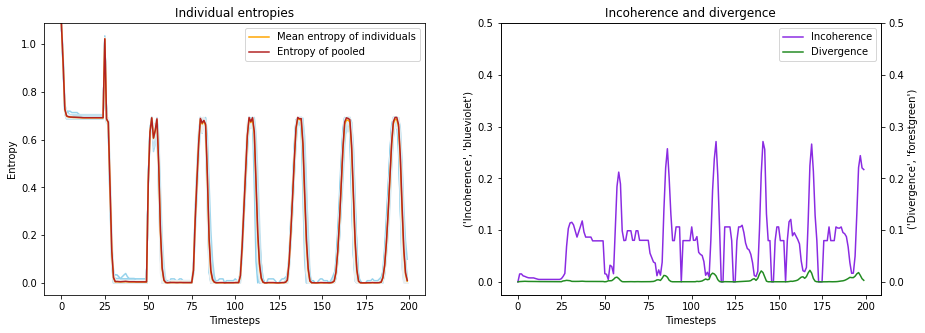

In [87]:
results[1.3326000000000002].plot()

In [66]:
results[1.34565].models[0].histogram

[0, 840, 1]

In [57]:
temps = [ep.Continuous([m.temperatures.flatten() for m in r.models], metrics=('incoherence', )) for r in results.values()]

KeyboardInterrupt: 

In [ ]:
x = list(results.keys())
g = sns.lineplot(x=x, y=[t.incoherence for t in temps], color='purple')
sns.lineplot(data=globe.groupby('luminosity').var().reset_index(), x='luminosity', y='global average temperature', ax=g.twinx())

In [41]:
df.groupby('luminosity').mean()

,temperatures
luminosity,
0.48000,-9.625226
0.48435,-8.975665
0.48870,-8.331912
0.49305,-7.693863
0.49740,-7.061420
...,...
1.33260,0.941412
1.33695,1.137922
1.34130,1.372681
